Wavelet and DCT image compression
=========

This numerical tour showcases a comparison of Wavelet and DCT image "compression" by thresholding the transformed coefficients. This corresponds to the best non-linear approximation in these orthogonal bases.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pywt
import pywt.data

Load and display the original image.

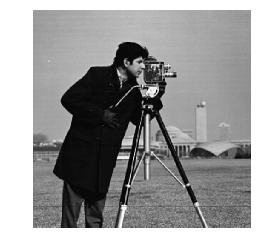

In [2]:
f = pywt.data.camera()
n = f.shape[0] # size of the image
plt.imshow(f, cmap='gray')
plt.axis('off');

Define the thresholding operator. Keep the $M$ largest coefficients of a vector.

In [3]:
def thresh(fw,M):
    a = np.sort(np.ravel(abs(fw)))[::-1] #sort a 1D copy of fw in descending order
    T = a[M]
    return fw * (abs(fw)>T)

Define the 2D DCT transform by applying the 1D DCT along each axis.

In [4]:
from scipy.fftpack import dct
def dct2(a):
    return dct( dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )
def idct2(a):
    return idct( idct( a, axis=1 , norm='ortho'), axis=0 , norm='ortho')

Usual measure of quality (of course debatable) is the PSNR (log of the $\ell^2$ error).

In [5]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

This controls the compression ration. Set ratio=100/100 to get the full image. 

In [6]:
ratio = 1.5/100
M = int(ratio * n**2)

Perform the DCT compression.

In [7]:
fd = dct2(f);
fd1 = thresh(fd,M)
f1 = idct2(fd1);

NameError: name 'idct' is not defined

Type of wavelet transform -- you can change this to see the effect

In [ ]:
# WT = 'db2'; # celebrated Daubechies Wavelet
# WT = 'bior3.5'; # biorthogonal but maybe a bit too wide 
# WT = 'haar'; # produces a blocky approximation
WT = 'bior2.4'; # not exactly orthogonal but considered good

Performs the Wavelet compression.

In [ ]:
fw, S = pywt.coeffs_to_array( pywt.wavedec2(f, WT) );
fw1 = thresh(fw,M)
f2 = pywt.waverec2( pywt.array_to_coeffs(fw1,S,output_format='wavedec2'), WT)

Display DCT and Wavelet compression.

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(fd1!=0); plt.axis('off'); plt.title('DCT coefs');
plt.subplot(1, 2, 2)
plt.imshow(np.clip(f1,0,255), cmap='gray'); plt.axis('off'); 
plt.title('Compres. PSNR=' + '{:.2f}'.format(psnr(f,f1)) + 'dB' );

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(fw1!=0); plt.axis('off'); plt.title('Wavelets coefs');
plt.subplot(1, 2, 2)
plt.imshow(np.clip(f2,0,255), cmap='gray'); plt.axis('off'); 
plt.title('Compres. PSNR=' + '{:.2f}'.format(psnr(f,f2)) + 'dB' );

In [ ]:
plt.imshow(np.clip(f1,0,255), cmap='gray'); plt.axis('off'); plt.title('DCT.compression');

In [ ]:
plt.imshow(np.clip(f2,0,255), cmap='gray'); plt.axis('off'); plt.title('Wav.compression');